<a href="https://colab.research.google.com/github/Jenny000327/ML_study/blob/main/diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 당뇨병 진행도 예측



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(2023)

In [ ]:
#데이터 로드하기
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

In [ ]:
diabetes["feature_names"] 
# bmi = Body mass index
# bp = Average blood pressure
# s1~s6 = 6가지 혈청에 대한 것  

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [ ]:
data, target = diabetes["data"], diabetes["target"]

In [ ]:
data[0]

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613])

In [ ]:
target[0]

151.0

In [ ]:
#EDA
df = pd.DataFrame(data, columns =diabetes["feature_names"])

In [ ]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


In [ ]:
#train, test 7:3 비율로 나누기 
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.3)

In [ ]:
#확인
len(data), len(train_data), len(test_data)

(442, 309, 133)

In [ ]:
print("train ratio : {:.2f}",format(len(train_data)/len(data)))
print("test ratio : {:.2f}",format(len(train_data)/len(data)))

train ratio : {:.2f} 0.6990950226244343
test ratio : {:.2f} 0.6990950226244343


#### 다변량 회귀분석

In [ ]:
#다변량 회귀
from sklearn.linear_model import LinearRegression


multi_regressor = LinearRegression()
multi_regressor.fit(train_data, train_target)

LinearRegression()

In [ ]:
#회귀식 확인
multi_regressor.intercept_

153.06428717240226

In [ ]:
multi_regressor.coef_

array([  20.95548435, -154.06766109,  596.66786429,  235.39770857,
       -411.25002222,    6.96130553,  126.48305215,  449.33409526,
        526.08125129,  111.58964586])

In [ ]:
#예측
multi_train_pred = multi_regressor.predict(train_data)
multi_test_pred = multi_regressor.predict(test_data)

In [ ]:
#평가
from sklearn.metrics import mean_squared_error

multi_train_mse = mean_squared_error(multi_train_pred, train_target)
multi_test_mse = mean_squared_error(multi_test_pred, test_target)

In [ ]:
print(f"Multi Regression Train MSE is {multi_train_mse:.4f}")
print(f"Multi Regression Test MSE is {multi_test_mse:.4f}")

Multi Regression Train MSE is 2620.0802
Multi Regression Test MSE is 3659.3033


#### 릿지 회기분석


In [ ]:
#학습
from sklearn.linear_model import Ridge


ridge_regressor = Ridge()
ridge_regressor.fit(train_data, train_target)

Ridge()

In [ ]:
#회귀식 확인
ridge_regressor.intercept_

153.52623346498322

In [ ]:
multi_regressor.coef_

array([  20.95548435, -154.06766109,  596.66786429,  235.39770857,
       -411.25002222,    6.96130553,  126.48305215,  449.33409526,
        526.08125129,  111.58964586])

In [ ]:
ridge_regressor.coef_

array([  44.45142067,  -40.35205349,  272.0186354 ,  148.46449022,
         15.75321485,  -19.40574567, -142.23870189,  138.6219505 ,
        231.23915654,  127.76582896])

In [ ]:
#예측
ridge_train_pred = ridge_regressor.predict(train_data)
ridge_test_pred = ridge_regressor.predict(test_data)


In [ ]:
#평가
ridge_train_mse = mean_squared_error(ridge_train_pred, train_target)
ridge_test_mse = mean_squared_error(ridge_test_pred, test_target)

In [ ]:
print(f"Ridge Regression Train MSE is {ridge_train_mse:.4f}")
print(f"Ridge Regression Test MSE is {ridge_test_mse:.4f}")

Ridge Regression Train MSE is 3165.3364
Ridge Regression Test MSE is 3972.2975


#### 라쏘 회귀분석

In [ ]:
#학습
from sklearn.linear_model import Lasso


lasso_regressor = Lasso()
lasso_regressor.fit(train_data, train_target)

Lasso()

In [ ]:
#회귀식 확인
lasso_regressor.intercept_

153.81317388835436

In [ ]:
lasso_regressor.coef_

array([  0.        ,   0.        , 426.80238947,   0.        ,
         0.        ,   0.        ,  -0.        ,   0.        ,
       309.64736505,   0.        ])

In [ ]:
np.array(diabetes["feature_names"])[lasso_regressor.coef_ != 0]

array(['bmi', 's5'], dtype='<U3')

In [ ]:
#예측
lasso_train_pred = lasso_regressor.predict(train_data)
lasso_test_pred = lasso_regressor.predict(test_data)

In [ ]:
#평가
lasso_train_mse = mean_squared_error(lasso_train_pred, train_target)
lasso_test_mse = mean_squared_error(lasso_test_pred, test_target)

In [ ]:
print(f"LASSO Regression Train MSE is {lasso_train_mse:.4f}")
print(f"LASSO Regression Test MSE is {lasso_test_mse:.4f}")

LASSO Regression Train MSE is 3516.0798
LASSO Regression Test MSE is 4165.0696


#### 결론 


In [ ]:
print(f"Multi Regression Test MSE is {multi_test_mse:.4f}")
print(f"Ridge Gegression Test MSE is {ridge_test_mse:.4f}")
print(f"LASSO Regression Test MSE is {lasso_test_mse:.4f}")

Multi Regression Test MSE is 3659.3033
Ridge Gegression Test MSE is 3972.2975
LASSO Regression Test MSE is 4165.0696


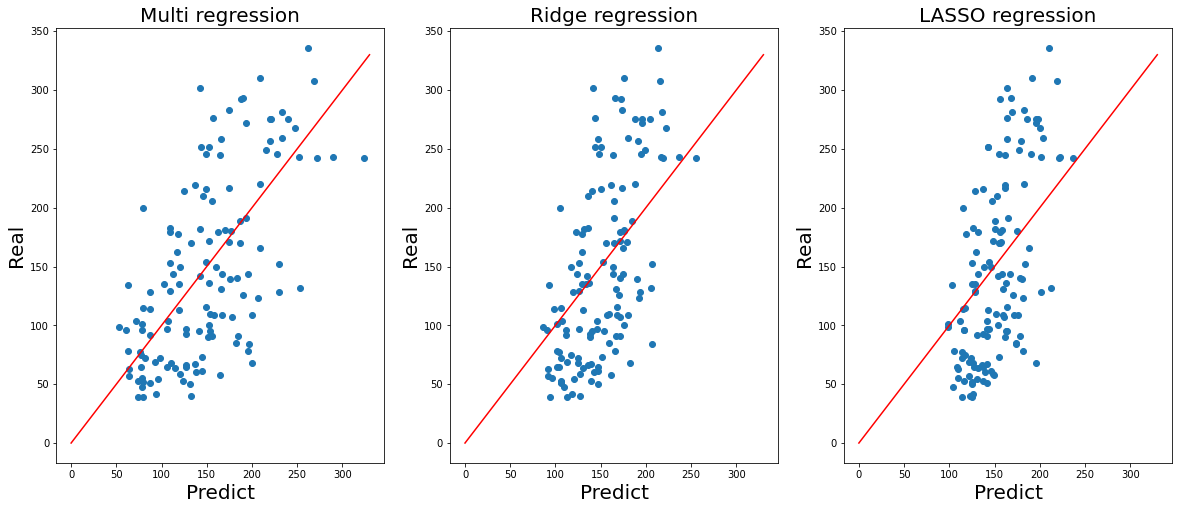

In [ ]:
#예측값, 실제값 관계 plot

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(20,8))
preds = [
    ("Multi regression", multi_test_pred),
    ("Ridge regression", ridge_test_pred),
    ("LASSO regression", lasso_test_pred),
]

for idx,(name, test_pred)in enumerate(preds):
    ax = axes[idx]
    ax.scatter(test_pred, test_target)
    ax.plot(np.linspace(0, 330, 100), np.linspace(0, 330, 100), color="red")
    ax.set_xlabel("Predict",fontsize = 20)
    ax.set_ylabel("Real",fontsize = 20)
    ax.set_title(name,fontsize = 20)